In [43]:
import torch
from spikingjelly.activation_based import neuron
from spikingjelly import visualizing
from matplotlib import pyplot as plt

#定义一个LIF神经元
lif_layer = neuron.LIFNode()
#输出LIF神经元中的膜电位电压: 记忆状态
print(lif_layer.v)


0.0


In [45]:
T=2
x = torch.rand(size=[2,3])

lif_layer.reset() #reset 函数清除之前的状态信息
for i in range(T):
    lif_layer(x)
    print('X', x, 'X shape:', x.shape)
    print('V', lif_layer.v, 'lif layer v shape', lif_layer.v.shape)
    
#可以发现连续给LIF node同样的输入，输出不一样，原因是LIF node可以通过膜电压记忆之前的输入

#如果把reset函数放入其中,发现前后两次输出结果会一样

X tensor([[0.9717, 0.9277, 0.8698],
        [0.1576, 0.4096, 0.0258]]) X shape: torch.Size([2, 3])
V tensor([[0.4858, 0.4638, 0.4349],
        [0.0788, 0.2048, 0.0129]]) lif layer v shape torch.Size([2, 3])
X tensor([[0.9717, 0.9277, 0.8698],
        [0.1576, 0.4096, 0.0258]]) X shape: torch.Size([2, 3])
V tensor([[0.4858, 0.4638, 0.4349],
        [0.0788, 0.2048, 0.0129]]) lif layer v shape torch.Size([2, 3])


In [24]:
T=2
x = torch.rand(size=[2,3])

for i in range(T):
    lif_layer.reset() #reset 函数清除之前的状态信息
    lif_layer(x)
    print('X', x, 'X shape:', x.shape)
    print('V', lif_layer.v, 'lif layer v shape', lif_layer.v.shape)

#把reset函数放入其中，验证了前后两次输出结果会一样

X tensor([[0.9713, 0.6615, 0.3122],
        [0.7492, 0.0834, 0.8931]]) X shape: torch.Size([2, 3])
V tensor([[0.4856, 0.3307, 0.1561],
        [0.3746, 0.0417, 0.4465]]) lif layer v shape torch.Size([2, 3])
X tensor([[0.9713, 0.6615, 0.3122],
        [0.7492, 0.0834, 0.8931]]) X shape: torch.Size([2, 3])
V tensor([[0.4856, 0.3307, 0.1561],
        [0.3746, 0.0417, 0.4465]]) lif layer v shape torch.Size([2, 3])


In [ ]:
#以下代码为示例片段，不可单独运行：

#充电代码：
def neuronal_charge(self, x:torch.Tensor):
    self.v = self.v + x

#放电代码：
def neuronal_fire(self):
    self.spike = self.surrogate_function(self.v - self.v_threshold)
    #surrogate function在前向传播时为阶跃函数，反向传播时使用替代函数的梯度计算方法

#神经元放电后需要对电压进行重置
#电压重置：
def neuronal_reset(self):
    if self.v_reset is None: #软重置方式
        self.v = self.v - self.spike*self.v_threshold
    else:                    #硬重置方式，重置回原始电压
        self.v = (1-self.spike)*self.v + self.spike*self.v_reset
    


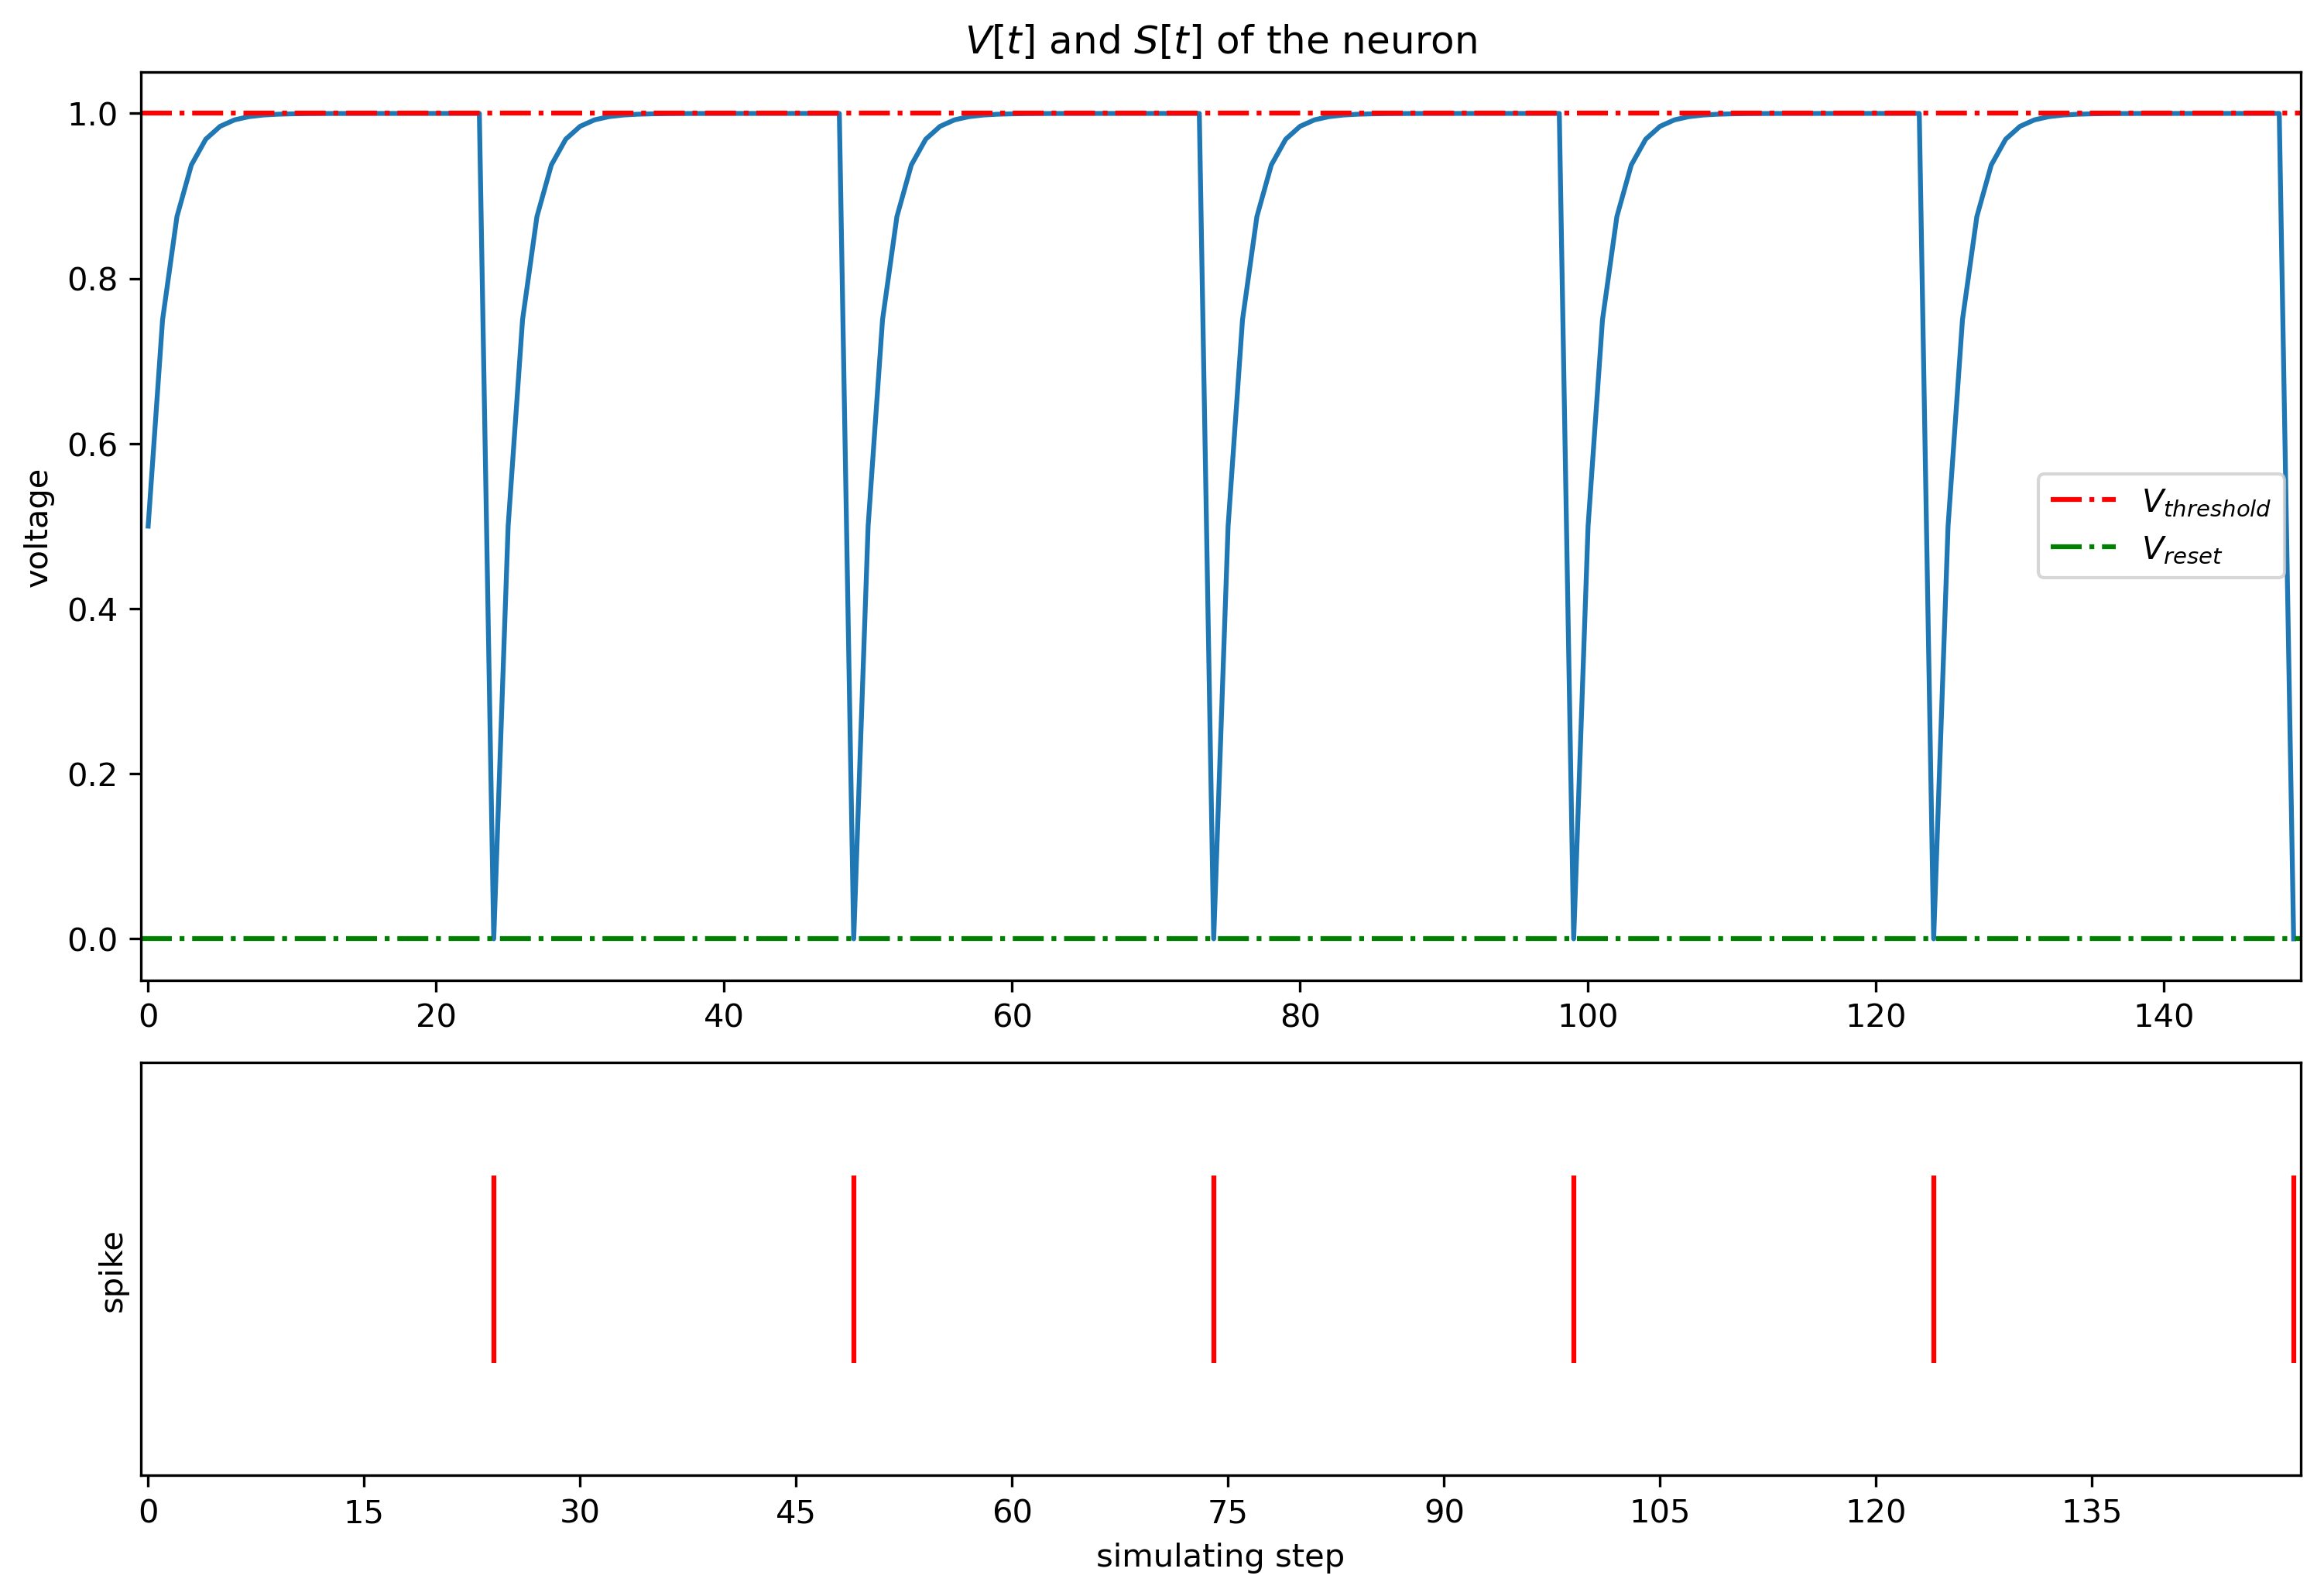

In [49]:
#对LIF node给持续性输入，并查看膜电位和输出脉冲
lif_layer.reset()
#注意：输入不一定是spike信号，也可以处理浮点数信号!
x = torch.as_tensor([1])
T = 150

s_list = []
v_list = []
for t in range(T):
    s_list.append(lif_layer(x))
    v_list.append(lif_layer.v)

dpi = 300
figsize = (12, 8)
visualizing.plot_one_neuron_v_s(torch.cat(v_list).numpy(), torch.cat(s_list).numpy(), v_threshold=lif_layer.v_threshold,
                                v_reset=lif_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()
#上图是V[t]
#下图是S[t]
#调整x的数值看看不同效果，默认为1

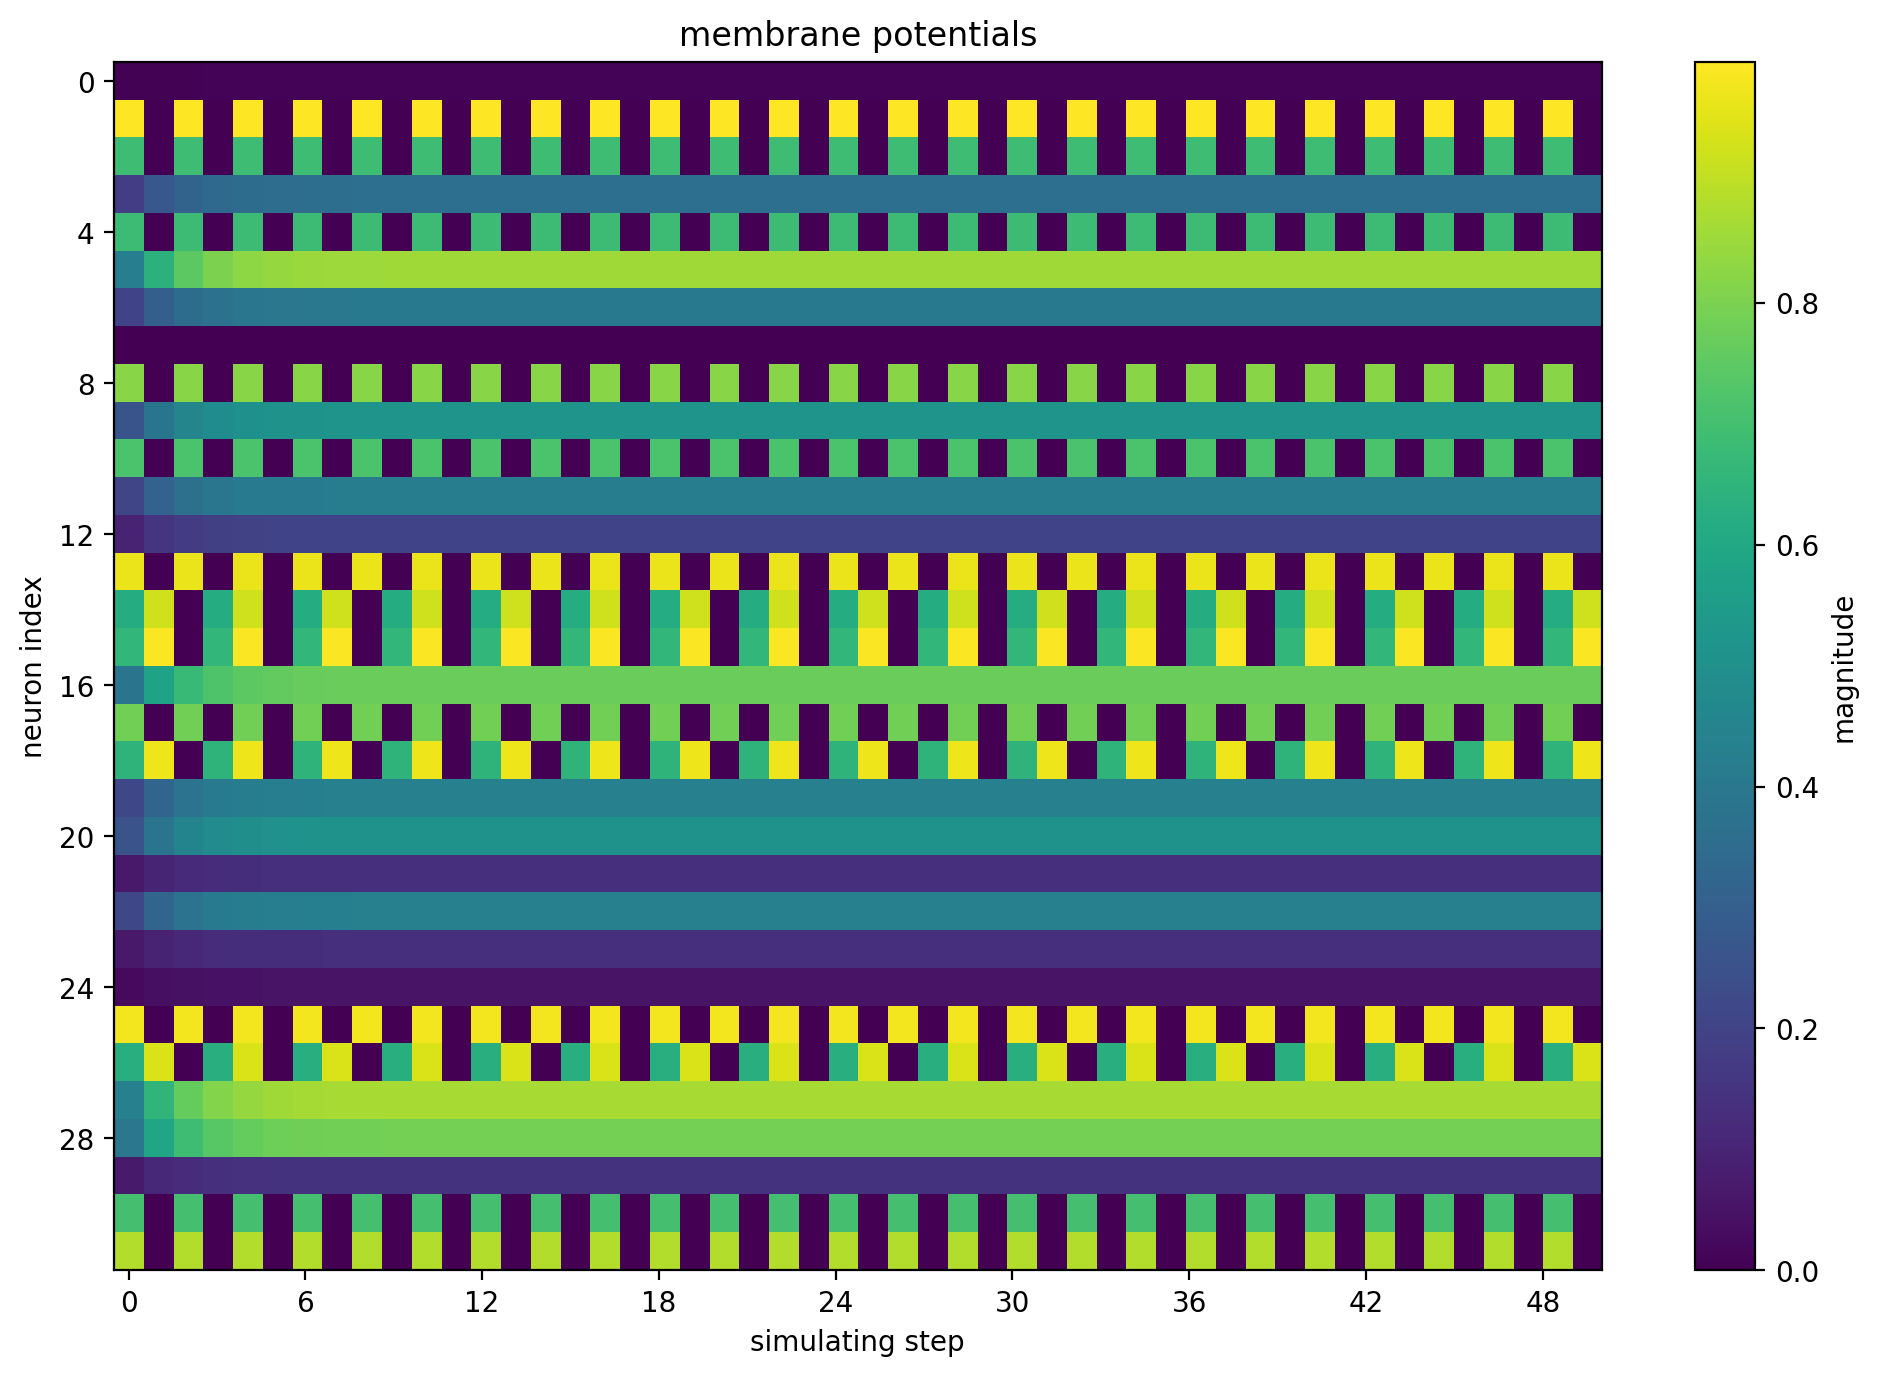

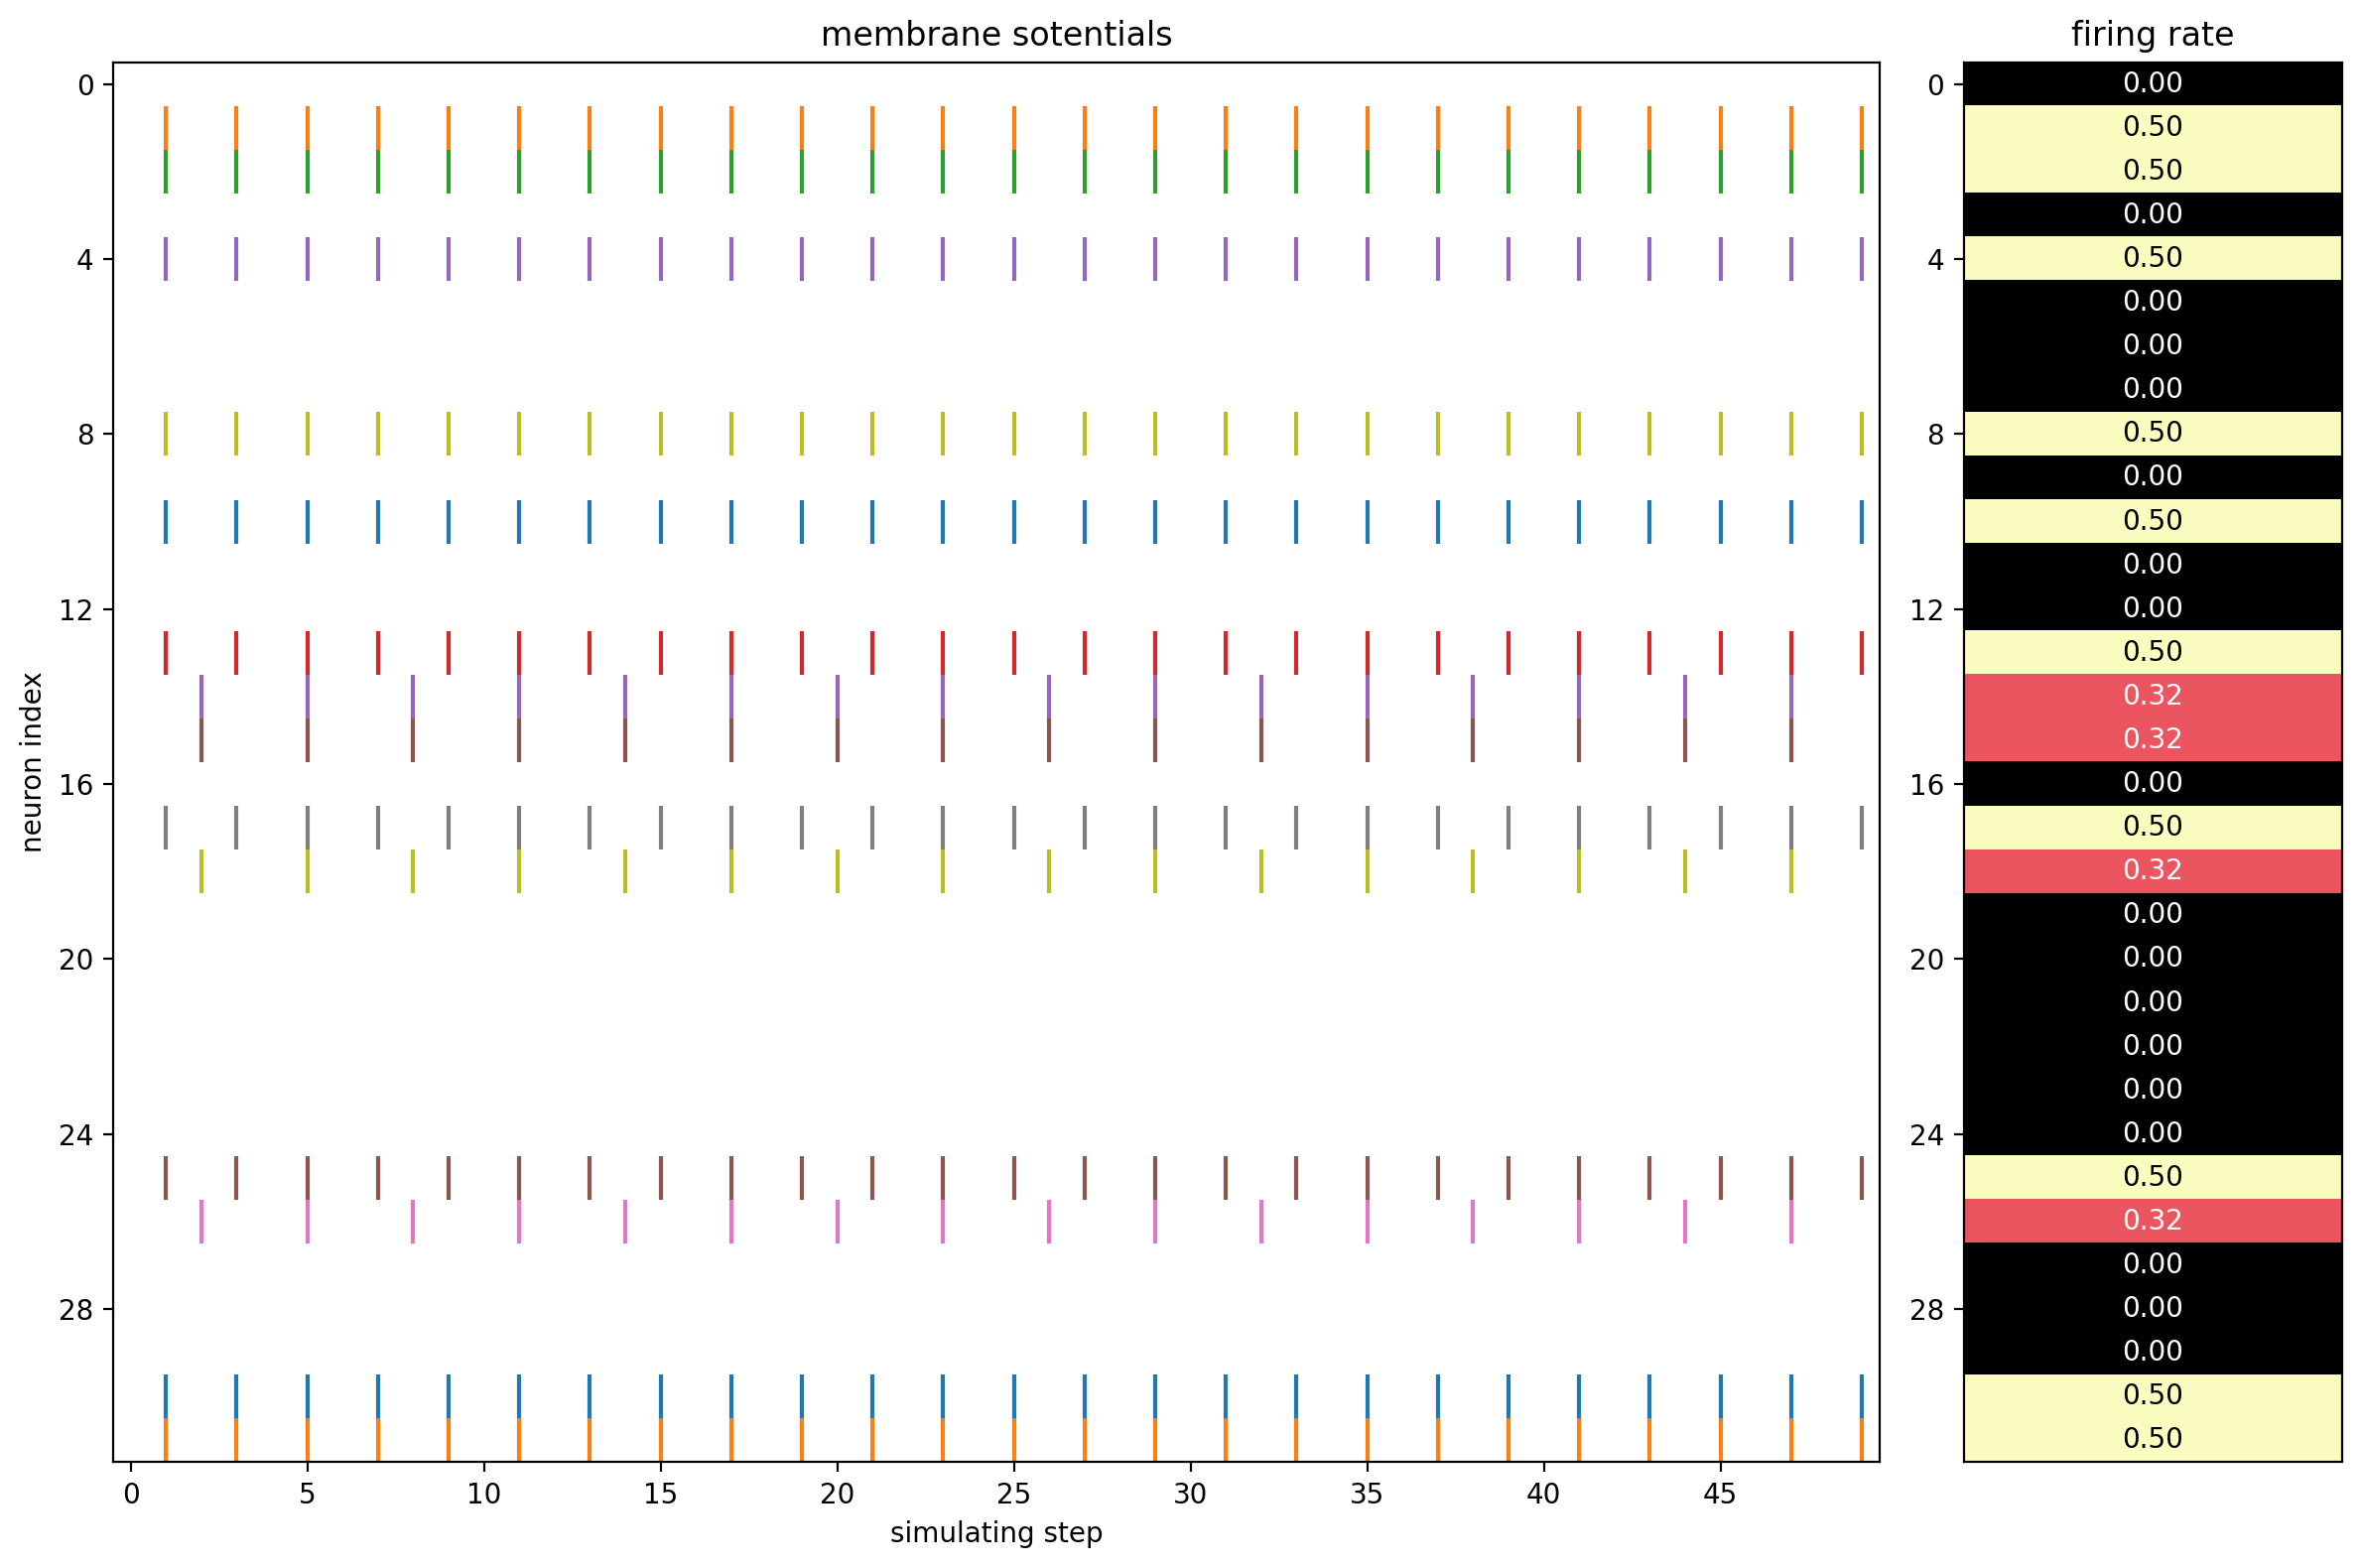

In [32]:
#使用多维输入，观察多维输出
lif_layer.reset()
T = 50
x = torch.rand([32]) * 2.
s_list = []
v_list = []
for t in range(T):
    s_list.append(lif_layer(x).unsqueeze(0))
    v_list.append(lif_layer.v.unsqueeze(0))

s_list = torch.cat(s_list)
v_list = torch.cat(v_list)

figsize = (12, 8)
dpi = 200
visualizing.plot_2d_heatmap(array=v_list.numpy(), title='membrane potentials', xlabel='simulating step',
                            ylabel='neuron index', int_x_ticks=True, x_max=T, figsize=figsize, dpi=dpi)


visualizing.plot_1d_spikes(spikes=s_list.numpy(), title='membrane sotentials', xlabel='simulating step',
                        ylabel='neuron index', figsize=figsize, dpi=dpi)

plt.show()

In [50]:
#跨越LIF layer层求导数
T = 10
x = torch.rand([32]) * 2.
x.requires_grad = True
lif_layer.reset()
s_list = []
v_list = []
for t in range(T):
    s_list.append(lif_layer(x).unsqueeze(0))
    v_list.append(lif_layer.v.unsqueeze(0))

s_list = torch.cat(s_list)
v_list = torch.cat(v_list)
print(s_list)
output = sum(sum(s_list))
print(output)

output.backward()
print('X的导数', x.grad)
print('X的导数的形状', x.grad.shape)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
         0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
         0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
         0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 

In [41]:
#我们发现，如果每次都需要写一个for循环，计算T步的输出的话，会非常麻烦，于是引入多步模式
#多步模式中，数据的第一个维度，即为T步，在代码中按照数据的第一个维度，实现好对应的步骤数量

import torch
from spikingjelly.activation_based import neuron, functional
if_layer = neuron.IFNode(step_mode='s')

T = 8
N = 2
x_seq = torch.rand([T, N])
y_seq = functional.multi_step_forward(x_seq, if_layer)
if_layer.reset()
print('第一种实现方式输出', y_seq)
if_layer.step_mode = 'm'
y_seq = if_layer(x_seq)
print('第二种实现方式输出', y_seq)
if_layer.reset()

#发现两种模式均可，第一种模式代码更为精简

第一种实现方式输出 tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 0.],
        [0., 1.],
        [1., 0.],
        [0., 0.]])
第二种实现方式输出 tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 0.],
        [0., 1.],
        [1., 0.],
        [0., 0.]])


In [42]:
#自定义神经元
#Spikingjelly使用充电，放电，重置三个方程来描述神经元
#一般现有研究中，neuronal_fire和neuronal_reset对绝大多数神经元都相同
#不同神经元主要是构造函数和充电函数不一样

#通过重载构造一种平方神经发放神经元, 其充电函数为V[t]=f(V[t-1],X[t]) = V[t-1]+X[t]^2

import torch
from spikingjelly.activation_based import neuron

class SquareIFNode(neuron.BaseNode):
    def neuronal_charge(self, x:torch.Tensor):
        self.v = self.v + x**2

sif_layer = SquareIFNode()

T = 4
N = 1
x_seq = torch.rand([T, N])
print(f'x_seq={x_seq}')

for t in range(T):
    yt = sif_layer(x_seq[t])
    print(f'sif_layer.v[{t}]={sif_layer.v}')

sif_layer.reset()
sif_layer.step_mode = 'm'
y_seq = sif_layer(x_seq)
print(f'y_seq={y_seq}')
sif_layer.reset()



x_seq=tensor([[0.4051],
        [0.9310],
        [0.4014],
        [0.5157]])
sif_layer.v[0]=tensor([0.1641])
sif_layer.v[1]=tensor([0.])
sif_layer.v[2]=tensor([0.1611])
sif_layer.v[3]=tensor([0.4271])
y_seq=tensor([[0.],
        [1.],
        [0.],
        [0.]])


In [ ]:
#课堂练习：定义如下的充电函数的神经发放神经元，输出为所有时刻的脉冲的和，打印输出对输入的导数
#充电函数为V[t]=f(V[t-1],X[t]) = V[t-1]+X[t]^3+X[t]^2+X[t]
#并思考如下问题，充电函数充电太快好不好，充电太慢好不好。写在提交notebook内，notebook提交canvas。